important 変数を個々に定義する

In [1]:
SensorNum=4 # Sensor number
SampleNum=16 # Window Width
Overlap=0.5 # overlap
width=3000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note 
Axis='AccZ' # Axis

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.regularizers import l1,l2,l1l2,activity_l1,activity_l2,activity_l1l2
import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN 4007)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
WORKSPACE_PATH = '/home/takeyama/pywork/ipython/2016-07-18'

StudyDataPath=WORKSPACE_PATH+'/Study/'+DataName+'/'+'Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataPath): os.makedirs(StudyDataPath)

GlaphDataPath=WORKSPACE_PATH+'/Graph/'+DataName+'/Learning-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(GlaphDataPath): os.makedirs(GlaphDataPath)

StudyDataModelPicPath=WORKSPACE_PATH+'/Study/'+DataName+'/modelPic-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataModelPicPath): os.makedirs(StudyDataModelPicPath)

WindowDataPath=WORKSPACE_PATH+'/window/'
RawDataPath=WORKSPACE_PATH+'/raw/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

In [7]:
w=window.Window()
w.SetData(Axis,dic[Axis])
wind=w.Compile(windowWidth=SampleNum,overlap=Overlap)
windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

AccZ is registed now
Build Complete
(254742,)


In [8]:
windoW.shape

(15921, 16)

**前回やった学習をもう１度やってみる  
今回は、正則化をする  
使用するものはl1( L1 weight regularization penalty, also known as LASSO )  
実際、どのくらいの重みにすればいいのかわからないので色々試してみる  **

In [9]:
ParameterL1=[0.01,0.1,0.3,0.5,0.7,0.9]

L1 parameter is 0.01
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 30s - loss: 0.0383 - val_loss: 0.0075
Epoch 2/50
15921/15921 [==============================] - 30s - loss: 0.0101 - val_loss: 0.0042
Epoch 3/50
15921/15921 [==============================] - 30s - loss: 0.0074 - val_loss: 0.0029
Epoch 4/50
15921/15921 [==============================] - 30s - loss: 0.0060 - val_loss: 0.0021
Epoch 5/50
15921/15921 [==============================] - 30s - loss: 0.0050 - val_loss: 0.0017
Epoch 6/50
15921/15921 [==============================] - 30s - loss: 0.0044 - val_loss: 0.0013
Epoch 7/50
15921/15921 [==============================] - 30s - loss: 0.0040 - val_loss: 0.0012
Epoch 8/50
15921/15921 [==============================] - 30s - loss: 0.0037 - val_loss: 0.0012
Epoch 9/50
15921/15921 [==============================] - 30s - loss: 0.0035 - val_loss: 9.9373e-04
Epoch 10/50
15921/15921 [==============================] - 30

/home/takeyama/.pyenv/versions/takeyama/lib/python2.7/site-packages/keras/backend/theano_backend.py:514: UserWarning: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 1 is not part of the computational graph needed to compute the outputs: keras_learning_phase.
To make this warning into an error, you can pass the parameter on_unused_input='raise' to theano.function. To disable it completely, use on_unused_input='ignore'.
  **kwargs)


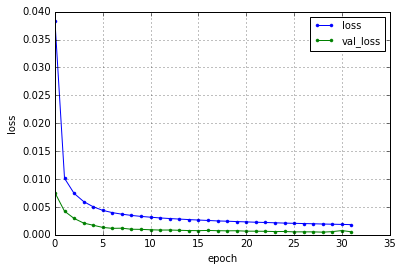

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 25s - loss: 0.0268 - val_loss: 0.0051
Epoch 2/50
15921/15921 [==============================] - 25s - loss: 0.0100 - val_loss: 0.0028
Epoch 3/50
15921/15921 [==============================] - 24s - loss: 0.0071 - val_loss: 0.0018
Epoch 4/50
15921/15921 [==============================] - 25s - loss: 0.0055 - val_loss: 0.0011
Epoch 5/50
15921/15921 [==============================] - 25s - loss: 0.0046 - val_loss: 7.5818e-04
Epoch 6/50
15921/15921 [==============================] - 25s - loss: 0.0040 - val_loss: 7.2899e-04
Epoch 7/50
15921/15921 [==============================] - 25s - loss: 0.0035 - val_loss: 5.0779e-04
Epoch 8/50
15921/15921 [==============================] - 25s - loss: 0.0032 - val_loss: 4.8646e-04
Epoch 9/50
15921/15921 [==============================] - 25s - loss: 0.0030 - val_loss: 4.1525e-04
Epoch 10/50
15921/15921 [==============================] - 24s - l

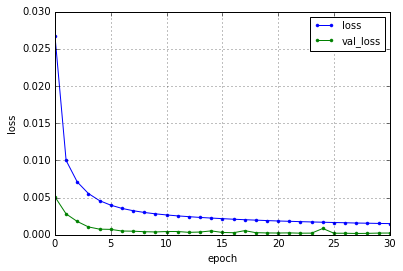

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 25s - loss: 0.0205 - val_loss: 0.0029
Epoch 2/50
15921/15921 [==============================] - 25s - loss: 0.0076 - val_loss: 0.0013
Epoch 3/50
15921/15921 [==============================] - 24s - loss: 0.0055 - val_loss: 6.9258e-04
Epoch 4/50
15921/15921 [==============================] - 24s - loss: 0.0046 - val_loss: 6.3025e-04
Epoch 5/50
15921/15921 [==============================] - 25s - loss: 0.0039 - val_loss: 4.3035e-04
Epoch 6/50
15921/15921 [==============================] - 25s - loss: 0.0035 - val_loss: 3.7819e-04
Epoch 7/50
15921/15921 [==============================] - 25s - loss: 0.0032 - val_loss: 3.2314e-04
Epoch 8/50
15921/15921 [==============================] - 140s - loss: 0.0029 - val_loss: 3.7149e-04
Epoch 9/50
15921/15921 [==============================] - 134s - loss: 0.0027 - val_loss: 2.9864e-04
Epoch 10/50
15921/15921 [==============================]

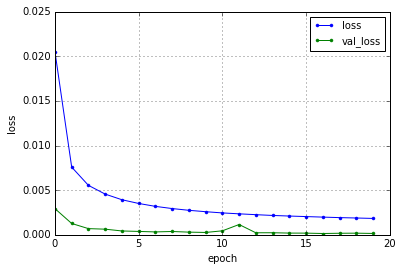

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 136s - loss: 0.0225 - val_loss: 0.0026
Epoch 2/50
15921/15921 [==============================] - 131s - loss: 0.0076 - val_loss: 0.0011
Epoch 3/50
15921/15921 [==============================] - 135s - loss: 0.0056 - val_loss: 9.8049e-04
Epoch 4/50
15921/15921 [==============================] - 130s - loss: 0.0047 - val_loss: 6.5000e-04
Epoch 5/50
15921/15921 [==============================] - 135s - loss: 0.0041 - val_loss: 5.1830e-04
Epoch 6/50
15921/15921 [==============================] - 130s - loss: 0.0037 - val_loss: 4.9257e-04
Epoch 7/50
15921/15921 [==============================] - 135s - loss: 0.0034 - val_loss: 4.3979e-04
Epoch 8/50
15921/15921 [==============================] - 132s - loss: 0.0032 - val_loss: 4.4298e-04
Epoch 9/50
15921/15921 [==============================] - 128s - loss: 0.0030 - val_loss: 4.1500e-04
Epoch 10/50
15921/15921 [========================

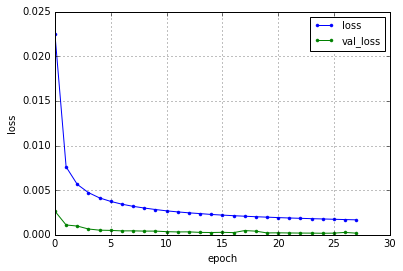

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 134s - loss: 0.0257 - val_loss: 0.0014
Epoch 2/50
15921/15921 [==============================] - 132s - loss: 0.0079 - val_loss: 6.3468e-04
Epoch 3/50
15921/15921 [==============================] - 130s - loss: 0.0060 - val_loss: 5.4743e-04
Epoch 4/50
15921/15921 [==============================] - 136s - loss: 0.0050 - val_loss: 3.8328e-04
Epoch 5/50
15921/15921 [==============================] - 130s - loss: 0.0043 - val_loss: 3.0130e-04
Epoch 6/50
15921/15921 [==============================] - 136s - loss: 0.0039 - val_loss: 2.9660e-04
Epoch 7/50
15921/15921 [==============================] - 131s - loss: 0.0036 - val_loss: 2.0345e-04
Epoch 8/50
15921/15921 [==============================] - 137s - loss: 0.0033 - val_loss: 2.6654e-04
Epoch 9/50
15921/15921 [==============================] - 131s - loss: 0.0031 - val_loss: 1.8864e-04
Epoch 10/50
15921/15921 [====================

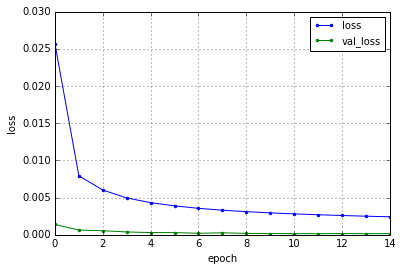

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 131s - loss: 0.0209 - val_loss: 7.7354e-04
Epoch 2/50
15921/15921 [==============================] - 135s - loss: 0.0078 - val_loss: 5.6101e-04
Epoch 3/50
15921/15921 [==============================] - 131s - loss: 0.0061 - val_loss: 4.1518e-04
Epoch 4/50
15921/15921 [==============================] - 136s - loss: 0.0052 - val_loss: 2.4336e-04
Epoch 5/50
15921/15921 [==============================] - 131s - loss: 0.0046 - val_loss: 3.3296e-04
Epoch 6/50
15921/15921 [==============================] - 136s - loss: 0.0042 - val_loss: 2.2531e-04
Epoch 7/50
15921/15921 [==============================] - 132s - loss: 0.0039 - val_loss: 2.7018e-04
Epoch 8/50
15921/15921 [==============================] - 130s - loss: 0.0037 - val_loss: 2.7915e-04
Epoch 9/50
15921/15921 [==============================] - 136s - loss: 0.0035 - val_loss: 1.9969e-04
Epoch 10/50
15921/15921 [================

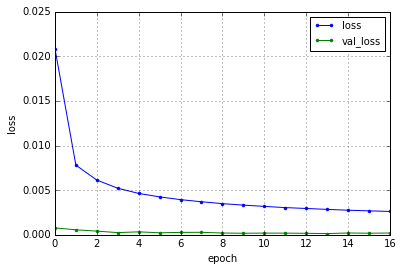

L1 parameter is 0.1
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 20s - loss: 0.0750 - val_loss: 0.0269
Epoch 2/50
15921/15921 [==============================] - 19s - loss: 0.0380 - val_loss: 0.0095
Epoch 3/50
15921/15921 [==============================] - 20s - loss: 0.0263 - val_loss: 0.0061
Epoch 4/50
15921/15921 [==============================] - 20s - loss: 0.0214 - val_loss: 0.0049
Epoch 5/50
15921/15921 [==============================] - 19s - loss: 0.0185 - val_loss: 0.0050
Epoch 6/50
15921/15921 [==============================] - 20s - loss: 0.0166 - val_loss: 0.0050
Epoch 7/50
15921/15921 [==============================] - 19s - loss: 0.0153 - val_loss: 0.0036
Epoch 8/50
15921/15921 [==============================] - 20s - loss: 0.0141 - val_loss: 0.0038
Epoch 9/50
15921/15921 [==============================] - 20s - loss: 0.0132 - val_loss: 0.0028
Epoch 10/50
15921/15921 [==============================] - 19s - l

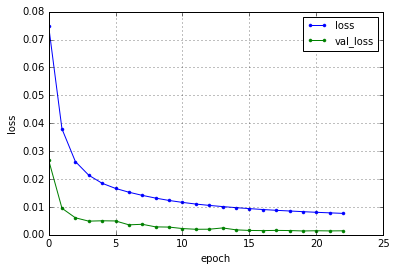

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 20s - loss: 0.0756 - val_loss: 0.0199
Epoch 2/50
15921/15921 [==============================] - 113s - loss: 0.0365 - val_loss: 0.0060
Epoch 3/50
15921/15921 [==============================] - 142s - loss: 0.0264 - val_loss: 0.0043
Epoch 4/50
15921/15921 [==============================] - 137s - loss: 0.0214 - val_loss: 0.0037
Epoch 5/50
15921/15921 [==============================] - 135s - loss: 0.0182 - val_loss: 0.0025
Epoch 6/50
15921/15921 [==============================] - 142s - loss: 0.0161 - val_loss: 0.0020
Epoch 7/50
15921/15921 [==============================] - 134s - loss: 0.0146 - val_loss: 0.0018
Epoch 8/50
15921/15921 [==============================] - 142s - loss: 0.0133 - val_loss: 0.0013
Epoch 9/50
15921/15921 [==============================] - 134s - loss: 0.0124 - val_loss: 0.0013
Epoch 10/50
15921/15921 [==============================] - 141s - loss: 0.0117

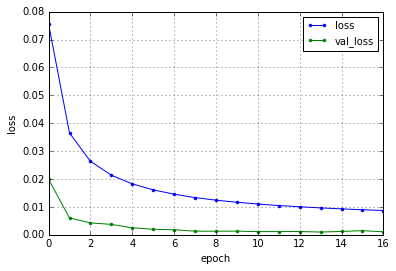

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 142s - loss: 0.0766 - val_loss: 0.0116
Epoch 2/50
15921/15921 [==============================] - 136s - loss: 0.0348 - val_loss: 0.0057
Epoch 3/50
15921/15921 [==============================] - 139s - loss: 0.0260 - val_loss: 0.0034
Epoch 4/50
15921/15921 [==============================] - 138s - loss: 0.0219 - val_loss: 0.0030
Epoch 5/50
15921/15921 [==============================] - 134s - loss: 0.0191 - val_loss: 0.0025
Epoch 6/50
15921/15921 [==============================] - 142s - loss: 0.0171 - val_loss: 0.0019
Epoch 7/50
15921/15921 [==============================] - 135s - loss: 0.0156 - val_loss: 0.0012
Epoch 8/50
15921/15921 [==============================] - 142s - loss: 0.0144 - val_loss: 0.0014
Epoch 9/50
15921/15921 [==============================] - 130s - loss: 0.0134 - val_loss: 0.0010
Epoch 10/50
15921/15921 [==============================] - 142s - loss: 0.012

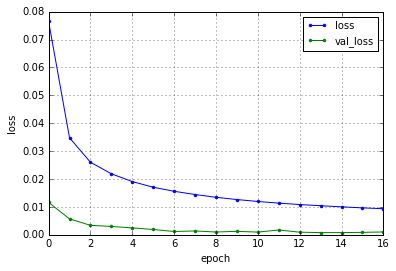

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 142s - loss: 0.0898 - val_loss: 0.0166
Epoch 2/50
15921/15921 [==============================] - 136s - loss: 0.0367 - val_loss: 0.0073
Epoch 3/50
15921/15921 [==============================] - 136s - loss: 0.0281 - val_loss: 0.0052
Epoch 4/50
15921/15921 [==============================] - 141s - loss: 0.0239 - val_loss: 0.0048
Epoch 5/50
15921/15921 [==============================] - 133s - loss: 0.0212 - val_loss: 0.0034
Epoch 6/50
15921/15921 [==============================] - 141s - loss: 0.0193 - val_loss: 0.0039
Epoch 7/50
15921/15921 [==============================] - 134s - loss: 0.0178 - val_loss: 0.0030
Epoch 8/50
15921/15921 [==============================] - 142s - loss: 0.0166 - val_loss: 0.0025
Epoch 9/50
15921/15921 [==============================] - 135s - loss: 0.0156 - val_loss: 0.0016
Epoch 10/50
15921/15921 [==============================] - 142s - loss: 0.014

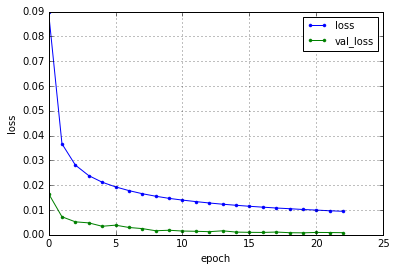

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 134s - loss: 0.0916 - val_loss: 0.0112
Epoch 2/50
15921/15921 [==============================] - 141s - loss: 0.0429 - val_loss: 0.0065
Epoch 3/50
15921/15921 [==============================] - 122s - loss: 0.0327 - val_loss: 0.0038
Epoch 4/50
15921/15921 [==============================] - 129s - loss: 0.0277 - val_loss: 0.0033
Epoch 5/50
15921/15921 [==============================] - 120s - loss: 0.0243 - val_loss: 0.0030
Epoch 6/50
15921/15921 [==============================] - 130s - loss: 0.0220 - val_loss: 0.0023
Epoch 7/50
15921/15921 [==============================] - 120s - loss: 0.0203 - val_loss: 0.0023
Epoch 8/50
15921/15921 [==============================] - 128s - loss: 0.0190 - val_loss: 0.0018
Epoch 9/50
15921/15921 [==============================] - 120s - loss: 0.0179 - val_loss: 0.0013
Epoch 10/50
15921/15921 [==============================] - 127s - loss: 0.016

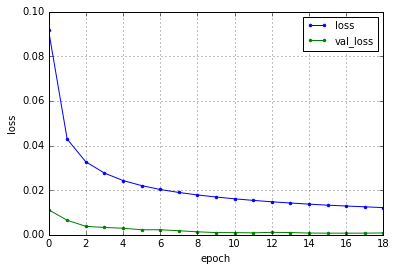

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1084 - val_loss: 0.0139
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0499 - val_loss: 0.0061
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0388 - val_loss: 0.0044
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0333 - val_loss: 0.0032
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0297 - val_loss: 0.0034
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0272 - val_loss: 0.0027
Epoch 7/50
15921/15921 [==============================] - 13s - loss: 0.0253 - val_loss: 0.0018
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0238 - val_loss: 0.0016
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0224 - val_loss: 0.0014
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0214 - val_lo

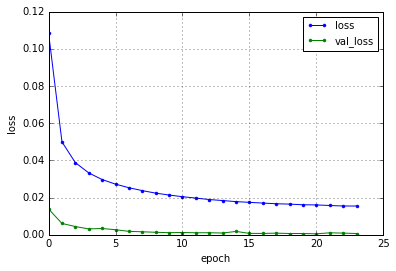

L1 parameter is 0.3
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1000 - val_loss: 0.0651
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0752 - val_loss: 0.0649
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0724 - val_loss: 0.0589
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0657 - val_loss: 0.0287
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0523 - val_loss: 0.0155
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0424 - val_loss: 0.0127
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0363 - val_loss: 0.0090
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0320 - val_loss: 0.0076
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0290 - val_loss: 0.0062
Epoch 10/50
15921/15921 [==============================] - 14s - l

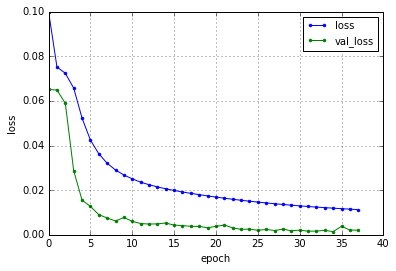

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1333 - val_loss: 0.0632
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0832 - val_loss: 0.0561
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0727 - val_loss: 0.0306
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0587 - val_loss: 0.0161
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0487 - val_loss: 0.0124
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0423 - val_loss: 0.0111
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0377 - val_loss: 0.0074
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0344 - val_loss: 0.0066
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0317 - val_loss: 0.0065
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0295 - val_lo

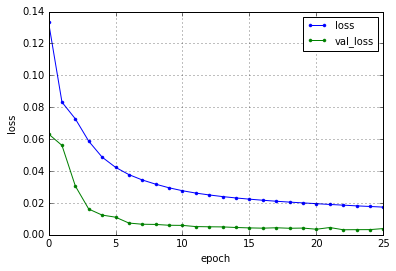

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1209 - val_loss: 0.0635
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0859 - val_loss: 0.0476
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0705 - val_loss: 0.0211
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0571 - val_loss: 0.0126
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0481 - val_loss: 0.0094
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0421 - val_loss: 0.0066
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0382 - val_loss: 0.0062
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0354 - val_loss: 0.0058
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0332 - val_loss: 0.0053
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0314 - val_lo

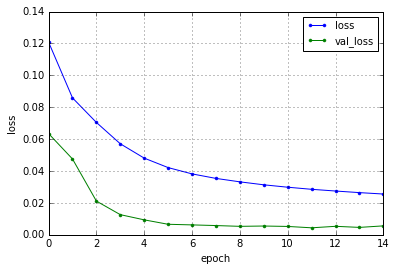

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.1423 - val_loss: 0.0624
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0928 - val_loss: 0.0566
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0799 - val_loss: 0.0258
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0637 - val_loss: 0.0132
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0527 - val_loss: 0.0123
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0459 - val_loss: 0.0075
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0414 - val_loss: 0.0091
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0381 - val_loss: 0.0053
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0355 - val_loss: 0.0046
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0336 - val_lo

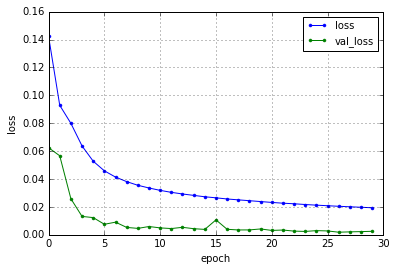

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1772 - val_loss: 0.0618
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.1058 - val_loss: 0.0553
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0948 - val_loss: 0.0414
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0786 - val_loss: 0.0182
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0659 - val_loss: 0.0105
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0583 - val_loss: 0.0079
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0532 - val_loss: 0.0065
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0496 - val_loss: 0.0063
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0468 - val_loss: 0.0086
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0447 - val_lo

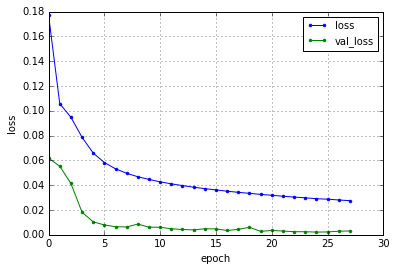

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.2119 - val_loss: 0.0611
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.1220 - val_loss: 0.0564
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.1074 - val_loss: 0.0277
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0895 - val_loss: 0.0157
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0779 - val_loss: 0.0105
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0709 - val_loss: 0.0072
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0658 - val_loss: 0.0062
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0621 - val_loss: 0.0072
Epoch 9/50
15921/15921 [==============================] - 13s - loss: 0.0589 - val_loss: 0.0057
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0566 - val_lo

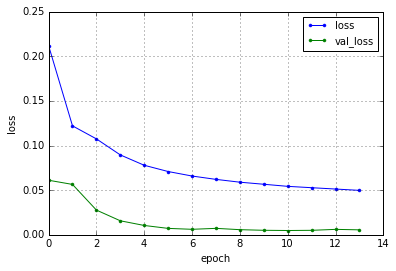

L1 parameter is 0.5
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1039 - val_loss: 0.0655
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0770 - val_loss: 0.0647
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0758 - val_loss: 0.0638
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0738 - val_loss: 0.0554
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0680 - val_loss: 0.0336
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0584 - val_loss: 0.0193
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0508 - val_loss: 0.0154
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0453 - val_loss: 0.0125
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0410 - val_loss: 0.0120
Epoch 10/50
15921/15921 [==============================] - 13s - l

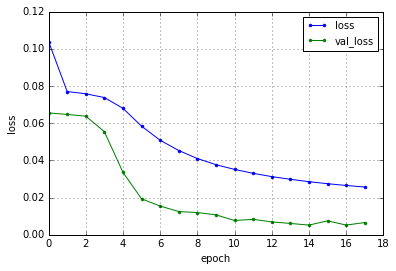

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1267 - val_loss: 0.0652
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0954 - val_loss: 0.0647
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0908 - val_loss: 0.0616
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0860 - val_loss: 0.0495
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0779 - val_loss: 0.0311
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0672 - val_loss: 0.0187
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0589 - val_loss: 0.0155
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0525 - val_loss: 0.0108
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0474 - val_loss: 0.0095
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0438 - val_lo

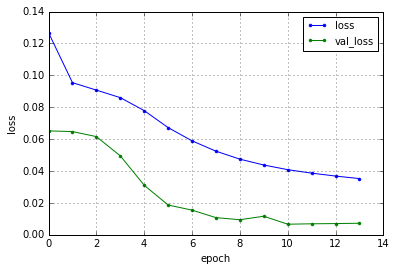

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1688 - val_loss: 0.0644
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.1051 - val_loss: 0.0622
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0984 - val_loss: 0.0604
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0927 - val_loss: 0.0524
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0847 - val_loss: 0.0350
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0739 - val_loss: 0.0207
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0646 - val_loss: 0.0131
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0579 - val_loss: 0.0126
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0529 - val_loss: 0.0111
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0491 - val_lo

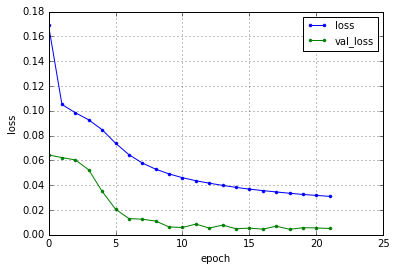

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 8s - loss: 0.1788 - val_loss: 0.0642
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1062 - val_loss: 0.0637
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.0996 - val_loss: 0.0585
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.0943 - val_loss: 0.0540
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.0875 - val_loss: 0.0391
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.0780 - val_loss: 0.0214
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.0689 - val_loss: 0.0161
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.0620 - val_loss: 0.0117
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0569 - val_loss: 0.0115
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.0529 - val_loss: 0.0107

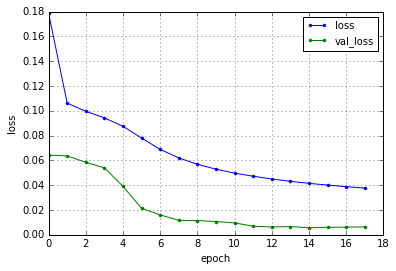

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.2632 - val_loss: 0.0633
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1390 - val_loss: 0.0632
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1233 - val_loss: 0.0627
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1149 - val_loss: 0.0561
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1060 - val_loss: 0.0300
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.0948 - val_loss: 0.0197
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.0851 - val_loss: 0.0147
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.0778 - val_loss: 0.0106
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0724 - val_loss: 0.0087
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.0683 - val_loss: 0.0106

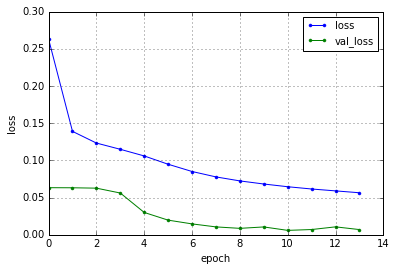

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.3047 - val_loss: 0.0627
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1695 - val_loss: 0.0622
Epoch 3/50
15921/15921 [==============================] - 8s - loss: 0.1529 - val_loss: 0.0556
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1416 - val_loss: 0.0544
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1313 - val_loss: 0.0341
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1193 - val_loss: 0.0216
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.1092 - val_loss: 0.0146
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.1017 - val_loss: 0.0098
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0956 - val_loss: 0.0089
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.0907 - val_loss: 0.0094

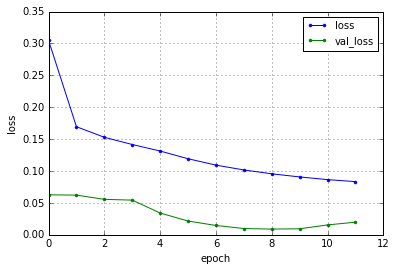

L1 parameter is 0.7
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.1303 - val_loss: 0.0656
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.0965 - val_loss: 0.0653
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.0848 - val_loss: 0.0648
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.0815 - val_loss: 0.0641
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.0793 - val_loss: 0.0622
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.0772 - val_loss: 0.0590
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.0747 - val_loss: 0.0541
Epoch 8/50
15921/15921 [==============================] - 8s - loss: 0.0705 - val_loss: 0.0437
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0642 - val_loss: 0.0325
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.057

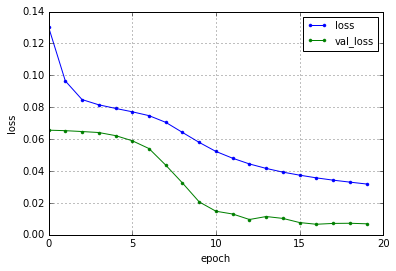

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.1470 - val_loss: 0.0648
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1045 - val_loss: 0.0633
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.0988 - val_loss: 0.0624
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.0951 - val_loss: 0.0628
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.0920 - val_loss: 0.0605
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.0891 - val_loss: 0.0568
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.0858 - val_loss: 0.0485
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.0807 - val_loss: 0.0410
Epoch 9/50
15921/15921 [==============================] - 10s - loss: 0.0742 - val_loss: 0.0290
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.0676 - val_loss: 0.019

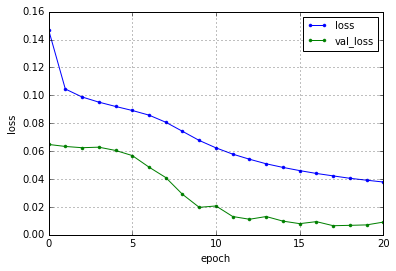

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.2081 - val_loss: 0.0652
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1153 - val_loss: 0.0639
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1063 - val_loss: 0.0633
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1017 - val_loss: 0.0606
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.0979 - val_loss: 0.0569
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.0934 - val_loss: 0.0491
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.0873 - val_loss: 0.0286
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.0796 - val_loss: 0.0254
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0729 - val_loss: 0.0147
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.0673 - val_loss: 0.0166

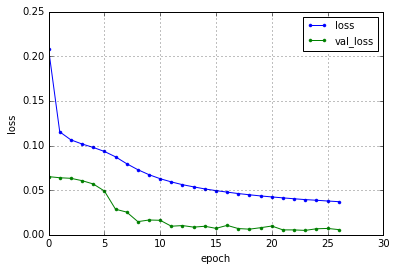

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.2418 - val_loss: 0.0649
Epoch 2/50
15921/15921 [==============================] - 7s - loss: 0.1328 - val_loss: 0.0641
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1223 - val_loss: 0.0644
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1153 - val_loss: 0.0628
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1095 - val_loss: 0.0641
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1045 - val_loss: 0.0554
Epoch 7/50
15921/15921 [==============================] - 8s - loss: 0.0988 - val_loss: 0.0411
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.0905 - val_loss: 0.0224
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0824 - val_loss: 0.0186
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.0756 - val_loss: 0.0161

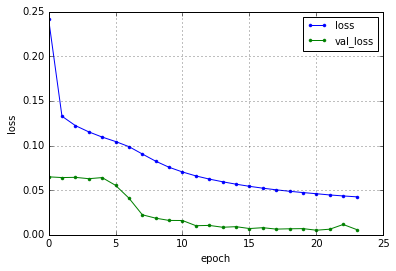

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.3046 - val_loss: 0.0634
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1665 - val_loss: 0.0622
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1491 - val_loss: 0.0616
Epoch 4/50
15921/15921 [==============================] - 7s - loss: 0.1394 - val_loss: 0.0593
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1321 - val_loss: 0.0544
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1250 - val_loss: 0.0461
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.1168 - val_loss: 0.0345
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.1081 - val_loss: 0.0235
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.1003 - val_loss: 0.0173
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.0940 - val_loss: 0.0102

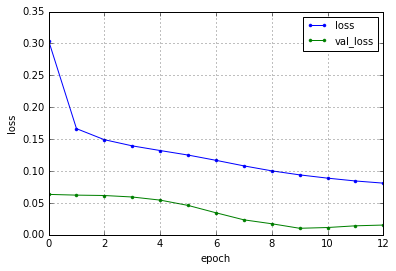

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.3801 - val_loss: 0.0637
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.2130 - val_loss: 0.0624
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1903 - val_loss: 0.0617
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1772 - val_loss: 0.0600
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1678 - val_loss: 0.0595
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1598 - val_loss: 0.0550
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.1519 - val_loss: 0.0293
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.1432 - val_loss: 0.0281
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.1347 - val_loss: 0.0272
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.1272 - val_loss: 0.0208

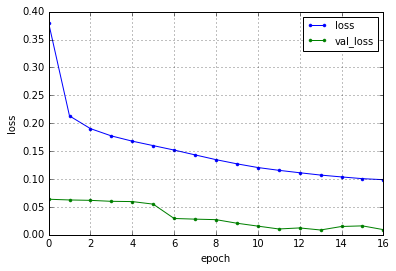

L1 parameter is 0.9
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.1196 - val_loss: 0.0661
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.0951 - val_loss: 0.0660
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.0914 - val_loss: 0.0662
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.0884 - val_loss: 0.0657
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.0862 - val_loss: 0.0656
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.0847 - val_loss: 0.0646
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.0836 - val_loss: 0.0636
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.0823 - val_loss: 0.0647
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0810 - val_loss: 0.0617
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.078

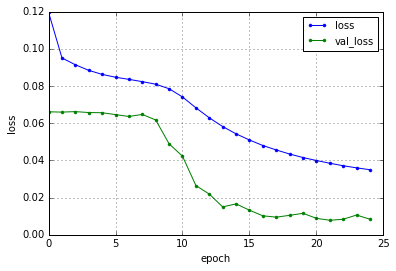

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.1660 - val_loss: 0.0659
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1150 - val_loss: 0.0659
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1086 - val_loss: 0.0654
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1044 - val_loss: 0.0650
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1013 - val_loss: 0.0649
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.0989 - val_loss: 0.0646
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.0967 - val_loss: 0.0606
Epoch 8/50
15921/15921 [==============================] - 7s - loss: 0.0943 - val_loss: 0.0586
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0913 - val_loss: 0.0574
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.0867 - val_loss: 0.0352

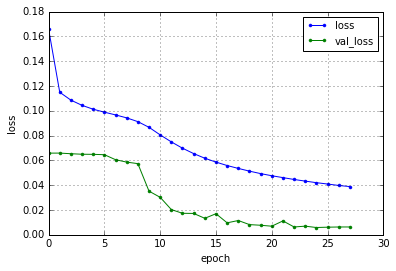

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.2694 - val_loss: 0.0654
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1275 - val_loss: 0.0650
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1188 - val_loss: 0.0644
Epoch 4/50
15921/15921 [==============================] - 5s - loss: 0.1131 - val_loss: 0.0643
Epoch 5/50
15921/15921 [==============================] - 5s - loss: 0.1091 - val_loss: 0.0639
Epoch 6/50
15921/15921 [==============================] - 5s - loss: 0.1062 - val_loss: 0.0598
Epoch 7/50
15921/15921 [==============================] - 5s - loss: 0.1031 - val_loss: 0.0570
Epoch 8/50
15921/15921 [==============================] - 5s - loss: 0.1000 - val_loss: 0.0528
Epoch 9/50
15921/15921 [==============================] - 5s - loss: 0.0963 - val_loss: 0.0509
Epoch 10/50
15921/15921 [==============================] - 4s - loss: 0.0917 - val_loss: 0.0400

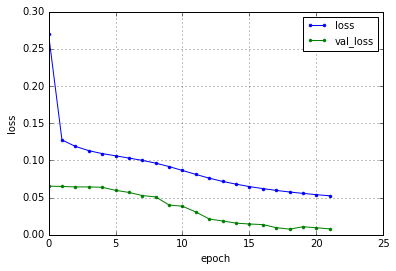

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 5s - loss: 0.2812 - val_loss: 0.0641
Epoch 2/50
15921/15921 [==============================] - 5s - loss: 0.1540 - val_loss: 0.0638
Epoch 3/50
15921/15921 [==============================] - 5s - loss: 0.1375 - val_loss: 0.0633
Epoch 4/50
15921/15921 [==============================] - 5s - loss: 0.1287 - val_loss: 0.0622
Epoch 5/50
15921/15921 [==============================] - 5s - loss: 0.1221 - val_loss: 0.0593
Epoch 6/50
15921/15921 [==============================] - 5s - loss: 0.1164 - val_loss: 0.0586
Epoch 7/50
15921/15921 [==============================] - 5s - loss: 0.1110 - val_loss: 0.0494
Epoch 8/50
15921/15921 [==============================] - 5s - loss: 0.1046 - val_loss: 0.0322
Epoch 9/50
15921/15921 [==============================] - 5s - loss: 0.0984 - val_loss: 0.0273
Epoch 10/50
15921/15921 [==============================] - 5s - loss: 0.0921 - val_loss: 0.0248

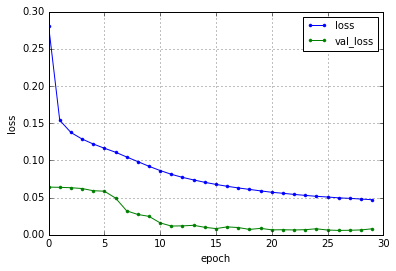

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 5s - loss: 0.3890 - val_loss: 0.0637
Epoch 2/50
15921/15921 [==============================] - 5s - loss: 0.1912 - val_loss: 0.0631
Epoch 3/50
15921/15921 [==============================] - 5s - loss: 0.1722 - val_loss: 0.0630
Epoch 4/50
15921/15921 [==============================] - 5s - loss: 0.1601 - val_loss: 0.0628
Epoch 5/50
15921/15921 [==============================] - 5s - loss: 0.1511 - val_loss: 0.0627
Epoch 6/50
15921/15921 [==============================] - 5s - loss: 0.1448 - val_loss: 0.0566
Epoch 7/50
15921/15921 [==============================] - 5s - loss: 0.1394 - val_loss: 0.0517
Epoch 8/50
15921/15921 [==============================] - 5s - loss: 0.1335 - val_loss: 0.0503
Epoch 9/50
15921/15921 [==============================] - 5s - loss: 0.1278 - val_loss: 0.0496
Epoch 10/50
15921/15921 [==============================] - 5s - loss: 0.1214 - val_loss: 0.0370

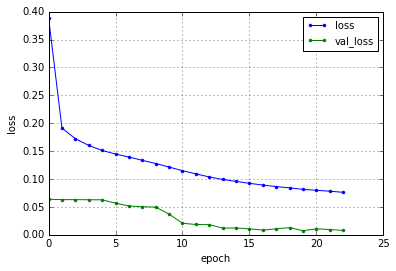

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 5s - loss: 0.5406 - val_loss: 0.0623
Epoch 2/50
15921/15921 [==============================] - 5s - loss: 0.2612 - val_loss: 0.0631
Epoch 3/50
15921/15921 [==============================] - 5s - loss: 0.2278 - val_loss: 0.0629
Epoch 4/50
15921/15921 [==============================] - 5s - loss: 0.2095 - val_loss: 0.0650


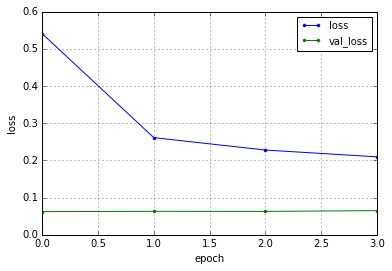

In [10]:
for pl1 in ParameterL1:
    print 'L1 parameter is '+str(pl1)
    for encoding_dim in EncodingDim:
        # define SaveFileName
        commonLabel='_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'-L1='+str(pl1)
        SaveFileNameEncord=DataName+'_encoded'+commonLabel
        SaveFileNameDecord=DataName+'_decoded'+commonLabel
        SaveFileNameNet=DataName+'_net'+'_edim='+commonLabel
        SaveFileNameTrain=DataName+'_train'+commonLabel
        SaveFileNameTest=DataName+'_test'+commonLabel
        SaveFileNameGlaph=GlaphDataPath+DataName+commonLabel+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh',
                       activity_regularizer=activity_l1(pl1))(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=2)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        batch_size=shapeNum/4,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])

        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()